##  Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import os
import json
import random, string, warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import accuracy_score, f1_score, hamming_loss


# To ignore all warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)


# Set seed for reproducability
SEED = 2024
random.seed(SEED)
np.random.seed(SEED)

## Loading and data understanding

In [2]:
# Loading the train datasets
train = pd.read_csv(r'C:\Users\User\Desktop\Blood-Spectroscopy-Classification\train data\Train.csv')
train_trimmed = pd.read_csv(r'C:\Users\User\Desktop\Blood-Spectroscopy-Classification\train data\Train_trimmed.csv')

# Loading the train datasets
test = pd.read_csv(r"C:\Users\User\Desktop\Blood-Spectroscopy-Classification\test data\Test.csv")
test_trimmed = pd.read_csv(r"C:\Users\User\Desktop\Blood-Spectroscopy-Classification\test data\Test_trimmed.csv")

In [3]:
# Previewing the train dataset
train.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,...,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,ok,ok,ok
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,...,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09,ok,high,high
2,ID_MVJGPQ75,0.444998,0.458034,0.447386,0.456921,0.463225,0.475983,0.476817,0.481565,0.490010,...,1.325059,1.271115,1.337119,1.289877,1.345229,45.77,24.80,ok,ok,high
3,ID_CK6RF8YV,0.513434,0.513303,0.522609,0.521068,0.523146,0.530132,0.539517,0.546364,0.552414,...,1.298422,1.299873,1.311157,1.303259,1.349833,45.84,36.93,low,ok,high
4,ID_82N6QE6I,0.510485,0.519359,0.524225,0.528419,0.535273,0.545342,0.550314,0.557129,0.567030,...,1.272367,1.290032,1.339771,1.322738,1.348964,38.92,23.88,ok,ok,high


In [4]:
# Previewing the trimmed train dataset
train_trimmed.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.561557,0.568417,0.571877,0.570884,0.569032,0.567476,0.565662,0.561901,0.559722,...,1.271104,1.264029,1.250779,1.254856,1.255224,42.51,34.01,ok,ok,ok
1,ID_599OOLZA,0.558420,0.565449,0.569717,0.570999,0.569969,0.568405,0.566628,0.564101,0.559951,...,1.342430,1.339714,1.332805,1.336324,1.342537,44.52,32.09,ok,high,high
2,ID_MVJGPQ75,0.530362,0.538530,0.543128,0.546287,0.547001,0.547120,0.546351,0.544254,0.542802,...,1.332739,1.335550,1.326775,1.336862,1.316860,45.77,24.80,ok,ok,high
3,ID_CK6RF8YV,0.594354,0.599457,0.604529,0.605267,0.606276,0.604895,0.603716,0.600683,0.598087,...,1.263479,1.252612,1.254306,1.247635,1.242321,45.84,36.93,low,ok,high
4,ID_82N6QE6I,0.604401,0.611372,0.614571,0.619713,0.619805,0.622708,0.620036,0.618070,0.616470,...,1.301750,1.288821,1.299768,1.294653,1.294362,38.92,23.88,ok,ok,high


In [5]:
# Previewing the train dataset
test.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,ID_37BEI22R,0.449736,0.449798,0.447488,0.464694,0.466377,0.485350,0.488915,0.495073,0.504129,...,1.223793,1.195193,1.205222,1.164610,1.151594,1.166565,1.157079,1.200857,40.88,25.70
1,ID_4W85V5DV,0.495429,0.505488,0.510239,0.518880,0.533147,0.543142,0.551670,0.558261,0.564027,...,1.310219,1.294600,1.269705,1.244257,1.238365,1.218063,1.252711,1.255433,42.35,30.16
2,ID_L4YR3NDY,0.437904,0.439064,0.442527,0.450437,0.455363,0.465817,0.471249,0.479145,0.482595,...,1.162556,1.161711,1.160406,1.159570,1.159641,1.157491,1.177478,1.169607,42.83,25.51
3,ID_U88E3SQ6,0.495038,0.506246,0.508730,0.518995,0.529961,0.537583,0.539696,0.540400,0.547279,...,1.168321,1.137272,1.109380,1.047561,1.050649,1.020026,1.033139,1.023882,40.95,41.32
4,ID_NW7Z3XU7,0.531306,0.525309,0.535306,0.541387,0.551364,0.559821,0.564851,0.570824,0.577426,...,1.288590,1.287614,1.300164,1.285028,1.272818,1.277348,1.248892,1.290145,46.99,24.21


In [6]:
# Previewing the trimmed test dataset

In [7]:
# Checking the shape of the training datasets
print(f'Train shape is {train.shape} \nTrain trimmed shape is {train_trimmed.shape}')

# Checking the shape of the testing datasets
print(f'Train shape is {train.shape} \nTrain trimmed shape is {train_trimmed.shape}')

Train shape is (13140, 176) 
Train trimmed shape is (13140, 154)
Train shape is (13140, 176) 
Train trimmed shape is (13140, 154)


In [8]:
# Checking the columns in the train dataset
train.columns

Index(['Reading_ID', 'absorbance0', 'absorbance1', 'absorbance2',
       'absorbance3', 'absorbance4', 'absorbance5', 'absorbance6',
       'absorbance7', 'absorbance8',
       ...
       'absorbance165', 'absorbance166', 'absorbance167', 'absorbance168',
       'absorbance169', 'temperature', 'humidity', 'hdl_cholesterol_human',
       'hemoglobin(hgb)_human', 'cholesterol_ldl_human'],
      dtype='object', length=176)

In [9]:
# Checking the data types in the train dataset
print('Train data types\n{}\n\n'.format(train.dtypes.value_counts()))

# Checking the data types in the trimmed train dataset
print('Trimmed train data types\n{}'.format(train_trimmed.dtypes.value_counts()))

# Checking the data types in the the test dataset
print(f'\nTest data types:\n{test.dtypes.value_counts()}')
print(f'\nTrimmed test data types:\n{test_trimmed.dtypes.value_counts()}')


Train data types
float64    172
object       4
Name: count, dtype: int64


Trimmed train data types
float64    150
object       4
Name: count, dtype: int64

Test data types:
float64    172
object       1
Name: count, dtype: int64

Trimmed test data types:
float64    150
object       1
Name: count, dtype: int64


In [10]:
# Previewing the object columns
train_object_columns = train.select_dtypes(include='object')
test_object_columns = test.select_dtypes(include='object')

In [11]:
# Previewing the object columns in the train dataset
train_object_columns.head()

,Reading_ID,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_3SSHI56C,ok,ok,ok
1,ID_599OOLZA,ok,high,high
2,ID_MVJGPQ75,ok,ok,high
3,ID_CK6RF8YV,low,ok,high
4,ID_82N6QE6I,ok,ok,high


In [12]:
# Previewing the object columns in the test dataset
test_object_columns.head()

,Reading_ID
0,ID_37BEI22R
1,ID_4W85V5DV
2,ID_L4YR3NDY
3,ID_U88E3SQ6
4,ID_NW7Z3XU7


## Data Preprocessing

This steps involves checking for duplicates and missing values and handling them

In [13]:
# checking for duplicated in both datasets
print(f'Train duplicates - {train.duplicated().sum()} \nTrain trimmed duplicates - {train_trimmed.duplicated().sum()}')

Train duplicates - 0 
Train trimmed duplicates - 0


In [14]:
# Checking for missing values in both datasets
print(f'Train null values - {train.isna().sum().sum()} \nTrain trimmed null values - {train_trimmed.isna().sum().sum()}')

Train null values - 0 
Train trimmed null values - 0


## Exploratory data analysis

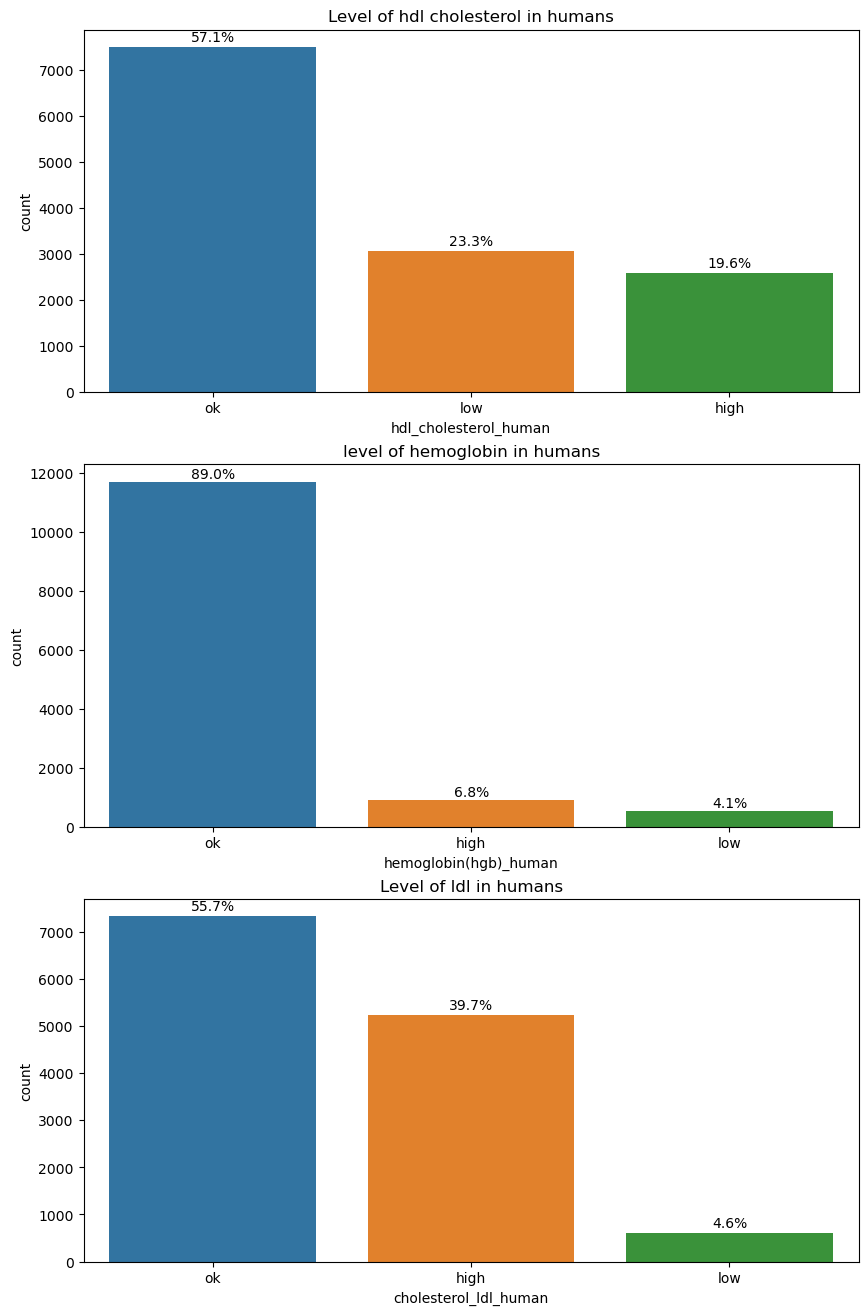

In [15]:
# Visualizing the distribution of the target variables
fig, axes = plt.subplots(3, 1, figsize=(10,16), sharey=False)

# Function to calculate percentage for each bar in the target variables
def add_percentage(ax):
    # Calculating the length of the dataset 
    total = len(train)

    # Looping over each bar in the bar plot
    for p in ax.patches:
        # Calculating the percentage
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        # Calculating the x coordinates for placing the annotation
        x = p.get_x() + p.get_width() / 2
        # Calculating the y coordinates for placing the annotation
        y = p.get_height() + 0.01 * total 
        # Adding the annotation to the bar plot 
        ax.annotate(percentage, (x, y), ha='center')

# Visualization to see the distribution of high density lipoprotein cholesterol in human blood
sns.countplot(x = 'hdl_cholesterol_human',data=train 
              ,ax=axes[0]).set_title('Level of hdl cholesterol in humans')
add_percentage(axes[0])

# Visualization to see the distribution of hemoglobin in human blood
sns.countplot(x='hemoglobin(hgb)_human'
              ,data=train,ax=axes[1]).set_title('level of hemoglobin in humans')
add_percentage(axes[1])

# Visualization to see the distribution of low density lipoprotein cholesterol in human blood
sns.countplot(x ='cholesterol_ldl_human',data = train
              ,ax=axes[2]).set_title('Level of ldl in humans')
add_percentage(axes[2])

# Displaying the plots
plt.show()


* It is evident that 39.7% of the population has high levels of low-density lipoprotein cholesterol, which raises the risk of stroke and heart disease.It is also evident that 4.6% of the population has low levels of low density lipoprotein cholesterol, which raises the risk of hemorrhagic stroke and cancer. This amounts to 44.3% of the population that is at high risk of developing chronic illnesses.

* It is evident that 6.8% of the population has a high level of hemoglobin, this is an indicator of a disease or the person lives in high altitude or they smoke.It  is also evident that 4.1% of the people has a low level of hemoglobin indicating that they are suffering from anaemia.

* It is clear that 23.3% of the people have low levels of high density lipoprotein cholesterol and 19.6% has high levels of it.HDL cholesterol is also refered to as 'good' cholesterol.High levels of it are associated with a lower risk of heart disease and low levels worsen the symptoms of other health conditions increasing complications.


#### Visualizing the independent variables using t-SNE

In [16]:
# Checking perplexity

'''
 A perplexity is more or less a target number of neighbors for our central point

'''
# Importing tsne
from sklearn.manifold import TSNE

#Importingg plotly for visualization
import plotly.express as px

# Defining the independent variables
X = train.drop(['hdl_cholesterol_human','hemoglobin(hgb)_human','cholesterol_ldl_human','Reading_ID'],axis=1)

# Defining the dependent variables
y = train[['hdl_cholesterol_human','hemoglobin(hgb)_human','cholesterol_ldl_human']]

# Creating aan array and an empty list
perplexity = np.arange(5, 55, 5)
divergence = []

# Looping over the perplexity array
for i in perplexity:
    # Instantiating a tsne model
    model = TSNE(n_components=2, init="pca", perplexity=i)
    # Fitting the model to the data
    reduced = model.fit_transform(X)
    # appending the Kullback-Leibler (KL) divergence to the empty list
    divergence.append(model.kl_divergence_)

fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

KL divergence is a measure of how much two distributions are different from one another.

Perplexity is simply the number of effective neighbors for each point

In [17]:
"""
The KL Divergence has become constant after 30 perplexity.
So, we will use 30 perplexity in t-SNE algorithm.
"""

# Importing the tsne class from sklearn.manifold module
from sklearn.manifold import TSNE

# Instantiating tsne class
tsne = TSNE(n_components=2,perplexity=30, random_state=SEED)

# fitting tsne class to the data
X_tsne = tsne.fit_transform(X)

# Measuring how the tsne dimensions captures the original data

'''
Low KL divergence is a sign of better results.
'''
tsne.kl_divergence_

0.5627299547195435

In [18]:
def combine_labels(row):
    return ', '.join(row.astype(str))

# Applying the function to each row of the 'y' DataFrame
y_combined = y.apply(combine_labels, axis=1)

# Creating the scatter plot
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y_combined)
fig.update_layout(
    title="t-SNE visualization of Blood spectroscopy dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()


### Conclusion
* Points in the plot that have similar colors are closer together which indicate that similar conditions or patterns exist among those data points.

* The overlaps between different colors suggests that there might be potential areas where patients are on the borderline between different health states.


## Feature engineering

In [26]:
train.head(2)

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,...,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,2,2,2
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,...,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09,2,0,0


In [27]:
train_trimmed.head(2)

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.561557,0.568417,0.571877,0.570884,0.569032,0.567476,0.565662,0.561901,0.559722,...,1.271104,1.264029,1.250779,1.254856,1.255224,42.51,34.01,2,2,2
1,ID_599OOLZA,0.558420,0.565449,0.569717,0.570999,0.569969,0.568405,0.566628,0.564101,0.559951,...,1.342430,1.339714,1.332805,1.336324,1.342537,44.52,32.09,2,0,0


In [19]:
from sklearn.preprocessing import LabelEncoder

# Function to label encode
def encoding(df):
    # List of target variables
    target_columns = ["hdl_cholesterol_human", "hemoglobin(hgb)_human", "cholesterol_ldl_human"]
    
    # Dictionary to store label encoders for each target variable
    encoders = {}
    
    # Applying label encoders to each target variable
    for col in target_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le
    
    return df, encoders

# Applying the function to the training data
train_encoded, encoders = encoding(train)
train_trimmed_encoded,trim_encoders= encoding(train_trimmed)


# encoded_values = train_encoded["hdl_cholesterol_human"]
# decoded_values = encoders["hdl_cholesterol_human"].inverse_transform(encoded_values)
# train_encoded["hdl_cholesterol_human"] = decoded_values


In [30]:
# Splitting the train data into training and local testing
from sklearn.model_selection import train_test_split

# Data splitting function
def split(df,test_size=0.25,random_state=42):
    # Defining the target variables
    target_columns = ["hdl_cholesterol_human",'hemoglobin(hgb)_human','cholesterol_ldl_human']
    
    # Defining the independent variable
    X = df.drop(columns=target_columns + ["Reading_ID"])
    
    # Defining the dependent variable
    y = df[target_columns]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

# Splitting the train encoded df
X_train, X_test, y_train, y_test = split(train_encoded)

# Splitting the train trimmed encoded df
X_train_trimmed, X_test_trimmed, y_train_trimmed, y_test_trimmed = split(train_trimmed_encoded)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Function for Scaling, feature reduction and whitening data on the data that is not trimmed
def preprocess_data(X_train, X_test,test, n_components=None):

    # Creating the pipeline
    pipeline = Pipeline([('scaler', StandardScaler()),  
        ('pca', PCA(n_components=n_components, whiten=True))])

    # Fitting and transforming the X_train data
    X_train_transformed = pipeline.fit_transform(X_train)

    # Transforming the X_test data
    X_test_transformed = pipeline.transform(X_test)

    # Transforming the test dataset
    test_transformed = pipeline.transform(test.drop(columns=["Reading_ID"]))

    return X_train_transformed,X_test_transformed,test_transformed


# Function for Scaling, feature reduction and whitening data on the trimmed data
def preprocess_data_trimmed(X_train_trimmed, X_test_trimmed,test_trimmed, n_components=None):

    # Creating the pipeline
    pipeline = Pipeline([('scaler', StandardScaler()),  
        ('pca', PCA(n_components=n_components, whiten=True))])

    # Fitting and transforming the X_train trimmed data
    X_train_trimmed_transformed = pipeline.fit_transform(X_train_trimmed)

    # Transforming the X_test trimmed data
    X_test_trimmed_transformed = pipeline.fit_transform(X_test_trimmed)

    # Transforming the test_trimmed dataset
    test_trimmed_transformed = pipeline.transform(test_trimmed.drop(columns=["Reading_ID"]))

    return X_train_trimmed_transformed,X_test_trimmed_transformed,test_trimmed_transformed



In [32]:
# Applying the functions on the data
X_train_whitened,X_test_whitened,test_whitened = preprocess_data(X_train, X_test,test, n_components=5)
X_train_trimmed_whitened,X_test_trimmed_whitened,test_trimmed_whitened = preprocess_data_trimmed(X_train_trimmed,
                                                                                        X_test_trimmed,test_trimmed,
                                                                                        n_components=5)

# Checking the shape of the data
print("X_train_whitened shape:", X_train_whitened.shape)
print("X_test_whitened shape:", X_test_whitened.shape)
print("test_whitened shape:", test_whitened.shape)

print("X_train_trimmed_whitened shape:", X_train_trimmed_whitened.shape)
print("X_test_trimmed_whitened shape:", X_test_trimmed_whitened.shape)
print("test_trimmed_whitened shape:", test_trimmed_whitened.shape)

X_train_whitened shape: (9855, 5)
X_test_whitened shape: (3285, 5)
test_whitened shape: (3660, 5)
X_train_trimmed_whitened shape: (9855, 5)
X_test_trimmed_whitened shape: (3285, 5)
test_trimmed_whitened shape: (3660, 5)


# Modelling

### 1. Classifier chain

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import accuracy_score, f1_score, hamming_loss

def classifier_chain_model(X_train, X_test, y_train, y_test, base_model=None, random_state=42):
    # Using RandomForestClassifier as the default base model
    if base_model is None:
        base_model = RandomForestClassifier(random_state=random_state)
    
    # Initializing the ClassifierChain with the base model
    chain_model = ClassifierChain(base_model, random_state=random_state)
    
    # Fitting the model to the training data
    chain_model.fit(X_train, y_train)
    
    # Making predictions on the training and test data
    y_pred_train = chain_model.predict(X_train)
    y_pred_test = chain_model.predict(X_test)
    
    # Function to calculate metrics
    def calculate_metrics(y_true, y_pred):
        accuracies = {}
        f1_scores = {}
        hamming_losses = {}
        
        for i, target in enumerate(y_true.columns):
            accuracy = accuracy_score(y_true[target], y_pred[:, i])
            f1 = f1_score(y_true[target], y_pred[:, i], average='macro')
            hamming = hamming_loss(y_true[target], y_pred[:, i])
            
            accuracies[target] = accuracy
            f1_scores[target] = f1
            hamming_losses[target] = hamming
            
            print(f"{target}: Accuracy = {accuracy}, F1 Score = {f1}, Hamming Loss = {hamming}")
        
        return accuracies, f1_scores, hamming_losses
    
    # Calculating metrics for the training set
    train_accuracies, train_f1_scores, train_hamming_losses = calculate_metrics(y_train, y_pred_train)
    
    # Calculating metrics for the test set
    test_accuracies, test_f1_scores, test_hamming_losses = calculate_metrics(y_test, y_pred_test)
    
    return {
        "train_accuracies": train_accuracies,
        "test_accuracies": test_accuracies,
        "train_f1_scores": train_f1_scores,
        "test_f1_scores": test_f1_scores,
        "train_hamming_losses": train_hamming_losses,
        "test_hamming_losses": test_hamming_losses,
    }

In [36]:
# Running the function
results = classifier_chain_model(X_train_whitened,X_test_whitened, y_train, y_test)

# Displaying the results
print("Training Accuracies:", results["train_accuracies"])
print("Test Accuracies:", results["test_accuracies"])
print("Training F1 Scores:", results["train_f1_scores"])
print("Test F1 Scores:", results["test_f1_scores"])
print("Training Hamming Losses:", results["train_hamming_losses"])
print("Test Hamming Losses:", results["test_hamming_losses"])

hdl_cholesterol_human: Accuracy = 1.0, F1 Score = 1.0, Hamming Loss = 0.0
hemoglobin(hgb)_human: Accuracy = 1.0, F1 Score = 1.0, Hamming Loss = 0.0
cholesterol_ldl_human: Accuracy = 1.0, F1 Score = 1.0, Hamming Loss = 0.0
hdl_cholesterol_human: Accuracy = 0.995738203957382, F1 Score = 0.9956438096371306, Hamming Loss = 0.00426179604261796
hemoglobin(hgb)_human: Accuracy = 0.9951293759512938, F1 Score = 0.9849624324633374, Hamming Loss = 0.004870624048706241
cholesterol_ldl_human: Accuracy = 0.9966514459665144, F1 Score = 0.9935023832191782, Hamming Loss = 0.0033485540334855404
Training Accuracies: {'hdl_cholesterol_human': 1.0, 'hemoglobin(hgb)_human': 1.0, 'cholesterol_ldl_human': 1.0}
Test Accuracies: {'hdl_cholesterol_human': 0.995738203957382, 'hemoglobin(hgb)_human': 0.9951293759512938, 'cholesterol_ldl_human': 0.9966514459665144}
Training F1 Scores: {'hdl_cholesterol_human': 1.0, 'hemoglobin(hgb)_human': 1.0, 'cholesterol_ldl_human': 1.0}
Test F1 Scores: {'hdl_cholesterol_human':

In [46]:
# Running the function
results_trimmed = classifier_chain_model(X_train_trimmed_whitened,X_test_trimmed_whitened, y_train, y_test)

# Displaying the results
print("Training Accuracies:", results["train_accuracies"])
print("Test Accuracies:", results["test_accuracies"])
print("Training F1 Scores:", results["train_f1_scores"])
print("Test F1 Scores:", results["test_f1_scores"])
print("Training Hamming Losses:", results["train_hamming_losses"])
print("Test Hamming Losses:", results["test_hamming_losses"])

hdl_cholesterol_human: Accuracy = 1.0, F1 Score = 1.0, Hamming Loss = 0.0
hemoglobin(hgb)_human: Accuracy = 1.0, F1 Score = 1.0, Hamming Loss = 0.0
cholesterol_ldl_human: Accuracy = 1.0, F1 Score = 1.0, Hamming Loss = 0.0
hdl_cholesterol_human: Accuracy = 0.9887366818873669, F1 Score = 0.987025610244475, Hamming Loss = 0.011263318112633182
hemoglobin(hgb)_human: Accuracy = 0.9929984779299847, F1 Score = 0.9773040990575647, Hamming Loss = 0.007001522070015221
cholesterol_ldl_human: Accuracy = 0.9908675799086758, F1 Score = 0.9871637956983285, Hamming Loss = 0.0091324200913242
Training Accuracies: {'hdl_cholesterol_human': 1.0, 'hemoglobin(hgb)_human': 1.0, 'cholesterol_ldl_human': 1.0}
Test Accuracies: {'hdl_cholesterol_human': 0.995738203957382, 'hemoglobin(hgb)_human': 0.9951293759512938, 'cholesterol_ldl_human': 0.9966514459665144}
Training F1 Scores: {'hdl_cholesterol_human': 1.0, 'hemoglobin(hgb)_human': 1.0, 'cholesterol_ldl_human': 1.0}
Test F1 Scores: {'hdl_cholesterol_human': 0